### visualize the pair_files (5 taxonomys)
- `seqs_taxo.pkl`

In [1]:
import pickle
from collections import defaultdict
import ast
import pandas as pd
import matplotlib as mpl
# import seaborn as sns
# mpl.get_backend()
import matplotlib.pyplot as plt
import numpy as np
from pyforest import *
from icecream import ic

In [4]:
"""seqs_tax.pkl (This file does not contain the common sequence data. Only the raw data.)
key: taxo_name
value: [SeqRecord(o.seq, o.id. o.name, o.description), ...] len(v) means how many orgranisms are in this taxonomy.

optional:
    If need the consensus strings, need to read con_file/{k}.txt
"""

seqs_taxo = defaultdict(list)
with open('pkl/seqs_taxo_5_total.pkl','rb') as f:
    seqs_taxo = pickle.load(f)
len(seqs_taxo)
# {k:name : v:full_sequence}

<IPython.core.display.Javascript object>

6

In [10]:
"""pair counts in Consensus sequence.
"""
stat_all = defaultdict(list)
dict_all = dict()
for k, v in seqs_taxo.items(): # Missing some minor keys.
    # Read the pair_files/.txt, which is generated from gb_analysis.ipynb.
    with open(f'pair_files/{k}.txt') as f:
        list_pair = ast.literal_eval(f.read()) # list[tuple(2)]
        stat_all['tname'].append(k)
        stat_all['tlist'].append(list_pair)
        stat_all['tnum'].append(len(v))
        dict_all[k] = list_pair
len(dict_all)

200

In [9]:
dict_all['Bacteria']

[('nucleophilic - hydrophobic', 1617),
 ('hydrophobic - acidic', 879),
 ('nucleophilic - acidic', 734),
 ('nucleophilic - nucleophilic', 708),
 ('hydrophobic - hydrophobic', 660),
 ('hydrophobic - amide', 587),
 ('nucleophilic - amide', 517),
 ('hydrophobic - basic', 382),
 ('acidic - acidic', 378),
 ('hydrophobic - aromatic', 360),
 ('acidic - amide', 336),
 ('nucleophilic - aromatic', 320),
 ('aromatic - acidic', 267),
 ('nucleophilic - basic', 256),
 ('acidic - basic', 250),
 ('aromatic - amide', 210),
 ('amide - basic', 161),
 ('aromatic - basic', 145),
 ('amide - amide', 115),
 ('aromatic - aromatic', 79),
 ('basic - basic', 62)]

In [11]:
len(stat_all['tname'])

200

In [14]:
stat_dat = pd.DataFrame(stat_all)

In [15]:
stat_dat.columns

Index(['tname', 'tlist', 'tnum'], dtype='object')

In [16]:
stat_dat.index

RangeIndex(start=0, stop=200, step=1)

In [18]:
df = pd.DataFrame(stat_dat)

In [19]:
df

,tname,tlist,tnum
0,Bacteria,"[(nucleophilic - hydrophobic, 1617), (hydropho...",15579
1,Proteobacteria,"[(nucleophilic - hydrophobic, 651), (hydrophob...",3187
2,Betaproteobacteria,"[(nucleophilic - hydrophobic, 521), (nucleophi...",159
3,Burkholderiales,"[(nucleophilic - hydrophobic, 560), (nucleophi...",119
4,Firmicutes,"[(nucleophilic - hydrophobic, 118), (hydrophob...",8306
...,...,...,...
195,Peptostreptococcus,"[(hydrophobic - basic, 154), (nucleophilic - h...",318
196,Pseudomonadaceae,"[(nucleophilic - hydrophobic, 1151), (hydropho...",713
197,Pseudomonas,"[(nucleophilic - hydrophobic, 1151), (hydropho...",713
198,Rathayibacter,"[(nucleophilic - hydrophobic, 71), (nucleophil...",184


In [26]:
"""Generate all the 200 taxonomies paired AAs histograms from df."""
for i in range(200):
    pairs = df.iloc[i]['tlist']
    num = df.iloc[i]['tnum']
    name = df.iloc[i]['tname']
    labels, values = zip(*pairs)
    indexes = np.arange(len(labels))
    width = 1

    fig = plt.figure(figsize=(20,8))
    plt.barh(indexes, values, width)
    plt.yticks(indexes + width * 0.5, labels)
    plt.title(f'{name} pairwise frequency: adjacent residues ({num} adhesive proteins)')
    # plt.show()
    plt.savefig(f'hists-svg/{name}.svg')
    plt.close(fig)

# For single As(subgroup) ratio analysis.

In [5]:

from Bio import AlignIO
from Bio import SeqIO
from Bio.Align import AlignInfo
from Bio.SeqRecord import SeqRecord
from tqdm import tqdm, trange
from icecream import ic
import collections

# from utils import *
import sequence_utils

from importlib import reload; reload(sequence_utils)
from sequence_utils import *

In [3]:
import pickle
with open('pkl/seqs_species_8.pkl', 'rb') as f:
    scan_dict = pickle.load(f)


In [6]:

stat_dict = defaultdict(list)
first = defaultdict(int)
second = defaultdict(int)
third = defaultdict(int)
fourth = defaultdict(int)
fifth = defaultdict(int)
rank_dict = {'1st': first, '2nd': second, '3rd': third, '4th': fourth, '5th': fifth}
subgroup_dict = {}

# Iterate in the aln_files folder, producing con_files/*
for k,v in scan_dict.items():
    # align = AlignIO.read(f"aln_files_six/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # print(consensus)
    # input()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files_six/{k}.txt', 'fasta')
    # with open(f'con_files_six/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    aa_dict, sum_counts = process_str(consensus)

    stat_dict['hydrophobic'].append(aa_dict['hydrophobic']*100/sum_counts)
    stat_dict['nucleophilic'].append(aa_dict['nucleophilic']*100/sum_counts)
    stat_dict['aromatic'].append(aa_dict['aromatic']*100/sum_counts)
    stat_dict['acidic'].append(aa_dict['acidic']*100/sum_counts)
    stat_dict['amide'].append(aa_dict['amide']*100/sum_counts)
    stat_dict['basic'].append(aa_dict['basic']*100/sum_counts)

    stat_dict['tname'].append(k)

stat_df = pd.DataFrame(stat_dict)
stat_df.head(20)
    # subgroup = process_pair_str(consensus)
    
    # # subgroup = process_pair_list(v)
    # subgroup_dict[k] = subgroup
    
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)




,hydrophobic,nucleophilic,aromatic,acidic,amide,basic,tname
0,35.800000,24.742857,7.514286,16.400000,10.428571,5.114286,Proteobacteria
1,32.033343,24.739506,5.299196,21.256326,6.579339,10.092289,Arthropoda
2,29.758589,24.466110,12.859796,11.652739,9.377902,11.884865,Cnidaria
3,30.771674,27.310257,7.335662,12.416640,7.621467,14.544300,Chordata
4,31.472081,22.842640,11.167513,14.720812,6.345178,13.451777,Stramenopiles
5,25.348075,29.361179,13.963964,12.694513,9.377559,9.254709,Echinodermata
6,35.229068,24.328594,19.984202,5.292259,5.687204,9.478673,Lophotrochozoa
7,24.560217,25.507442,8.525034,14.614344,8.728011,18.064953,Platyhelminthes


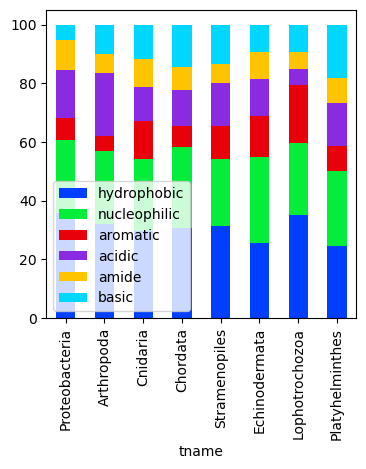

In [9]:

stat_df.plot(
    x = 'tname',
    kind = 'bar',
    stacked = True,
    # title = 'Stacked Bar Graph',
    mark_right = True, figsize=(4,4))
plt.savefig('csv/consensus_subgroup_ratio_raw_small_8_p.pdf', bbox_inches='tight')

In [10]:

stat_df.to_csv('csv/consensus_subgroup_ratio_raw_small_8_p.csv')

In [6]:
"""Legacy for consensus pair. """
"""Still for consensus sequence, but compute directly from the one sequence ratios."""
stat_dict = defaultdict(list)

# Iterate in the aln_files folder, producing con_files/*
for k, v in tqdm(seqs_taxo.items()):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    stat_dict['tname'].append(k)
    # consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    aa_dict, sum_counts = process_seq_list(v)
    

    stat_dict['hydrophobic'].append(aa_dict['hydrophobic']*100/sum_counts)
    stat_dict['nucleophilic'].append(aa_dict['nucleophilic']*100/sum_counts)
    stat_dict['aromatic'].append(aa_dict['aromatic']*100/sum_counts)
    stat_dict['acidic'].append(aa_dict['acidic']*100/sum_counts)
    stat_dict['amide'].append(aa_dict['amide']*100/sum_counts)
    stat_dict['basic'].append(aa_dict['basic']*100/sum_counts)

stat_df = pd.DataFrame(stat_dict)


100%|██████████| 6/6 [00:17<00:00,  2.84s/it]


In [7]:
stat_df.head(20)
# new_df = stat_df.drop(columns='aa_sum')
# from summarytools import summarytools
# summarytools.dfSummary(new_df)

# from skimpy import skim
# skim(new_df)

# from ydata_profiling import ProfileReport
# report = ProfileReport(new_df)
# report.to_notebook_iframe()
# report.to_widgets()
# report.to_file('my_report.html')

# import sweetviz as sv
# report = sv.analyze(new_df)
# report.show_notebook()

# from dataprep.eda import create_report
# create_report(new_df)

,tname,hydrophobic,nucleophilic,aromatic,acidic,amide,basic
0,Total,27.151952,23.399068,9.214682,15.268339,11.573579,13.392379
1,Bacteria,29.469477,22.315083,8.905442,15.639578,11.648221,12.022198
2,Eukaryota,23.707096,25.082963,9.668331,14.583100,11.466862,15.491648
3,Archaea,24.466189,19.191726,9.742243,25.885442,10.992840,9.721559
4,Viruses,28.665521,14.633448,12.886598,13.974800,15.750286,14.089347
5,other sequences,24.235768,24.748307,10.818232,13.655501,10.561962,15.980231


In [104]:
stat_df_simp = stat_df.drop(columns='aa_sum')
stat_df_simp.to_csv('single_stats.csv', float_format='{:.2f}'.format)

In [8]:
plt.style.use('seaborn-bright')
# import scienceplots
# plt.style.use('science')
# plt.style.use('ipynb')

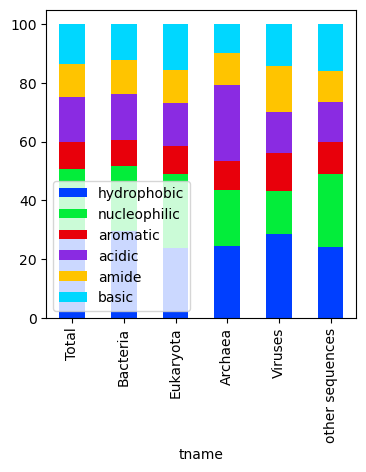

In [9]:
stat_df.plot(
    x = 'tname',
    kind = 'bar',
    stacked = True,
    # title = 'Stacked Bar Graph',
    mark_right = True, figsize=(4,4))
plt.savefig('csv/subgroup_ratio_raw.pdf', bbox_inches='tight')

In [10]:
stat_df.to_csv('csv/subgroup_ratio_raw.csv')

### Pair stacked bar graph computation. (pair counts)

In [11]:

stat_dict = defaultdict(list)
subgroup_dict = {}

# Iterate in the aln_files folder, producing con_files/*
for k,v in seqs_taxo.items():
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    # consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    
    subgroup = process_pair_list(v)
    subgroup_dict[k] = subgroup
    
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)
    """Top 5 pairs cut.
    """




In [12]:
subgroup_df = pd.DataFrame(subgroup_dict)
subgroup_df

,Total,Bacteria,Eukaryota,Archaea,Viruses,other sequences
acidic - basic,551202,316725,230543,3540,183,211
hydrophobic - acidic,1059205,712055,338760,7759,271,360
hydrophobic - aromatic,570401,345942,221674,2281,252,252
amide - basic,382453,212814,167891,1445,131,172
hydrophobic - basic,923477,567545,352360,2930,269,373
basic - basic,253346,112203,140360,530,84,169
aromatic - basic,366185,191970,172441,1431,115,228
aromatic - acidic,370034,233892,133020,2881,106,135
hydrophobic - amide,804100,520071,280787,2647,303,292
aromatic - amide,280829,173438,104467,2704,108,112


In [13]:
sorted_df = subgroup_df.sort_values(by=['Total'], ascending=False)
for col in sorted_df.columns:
    sorted_df[col] = sorted_df[col] / sum(sorted_df[col])
sorted_df

,Total,Bacteria,Eukaryota,Archaea,Viruses,other sequences
nucleophilic - hydrophobic,0.133453,0.146963,0.113812,0.086889,0.066475,0.111213
hydrophobic - acidic,0.082443,0.092860,0.066318,0.123770,0.077986,0.066067
hydrophobic - hydrophobic,0.073525,0.080775,0.062603,0.075962,0.094101,0.068269
hydrophobic - basic,0.071878,0.074014,0.068980,0.046739,0.077410,0.068453
nucleophilic - acidic,0.066173,0.065493,0.066424,0.130246,0.048058,0.062947
hydrophobic - amide,0.062587,0.067823,0.054969,0.042224,0.087194,0.053588
nucleophilic - nucleophilic,0.059685,0.052416,0.070894,0.036849,0.024748,0.066434
nucleophilic - basic,0.055346,0.042893,0.074358,0.028713,0.033381,0.077262
nucleophilic - amide,0.052365,0.049487,0.056927,0.032877,0.046043,0.055056
hydrophobic - aromatic,0.044397,0.045115,0.043396,0.036386,0.072518,0.046247


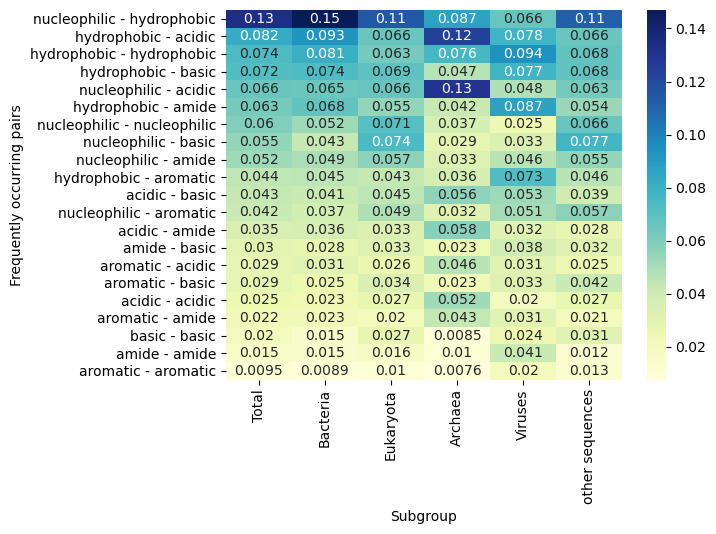

In [14]:
ax = sns.heatmap(sorted_df, annot=True, cmap="YlGnBu")
ax.set_xlabel("Subgroup")
ax.set_ylabel("Frequently occurring pairs")
plt.savefig("csv/paircounts_heatmap.pdf", bbox_inches="tight")

In [15]:
sorted_df.to_csv('csv/paircounts_heatmap.csv')

In [80]:
stat_df.head()

,tname,aa_sum,hydrophobic,nucleophilic,aromatic,acidic,amide,basic
0,Bacteria,"[(nucleophilic - hydrophobic, 1617), (hydropho...",41.496303,40.963462,0.0,17.540235,0.000000,0.000000
1,Proteobacteria,"[(nucleophilic - hydrophobic, 651), (hydrophob...",49.832589,25.892857,0.0,17.243304,7.031250,0.000000
2,Betaproteobacteria,"[(nucleophilic - hydrophobic, 521), (nucleophi...",30.258792,50.796284,0.0,12.873258,6.071666,0.000000
3,Burkholderiales,"[(nucleophilic - hydrophobic, 560), (nucleophi...",42.108626,45.559105,0.0,6.198083,6.134185,0.000000
4,Firmicutes,"[(nucleophilic - hydrophobic, 118), (hydrophob...",58.695652,12.826087,0.0,11.630435,9.021739,7.826087


In [84]:
stat_df['aa_sum'][0]

[('nucleophilic - hydrophobic', 1617),
 ('hydrophobic - acidic', 879),
 ('nucleophilic - acidic', 734),
 ('nucleophilic - nucleophilic', 708),
 ('hydrophobic - hydrophobic', 660)]

In [98]:
stat_df_simp = stat_df.drop(columns='aa_sum')
stat_df_simp.to_csv('pair_stats.csv', float_format='{:.2f}'.format)

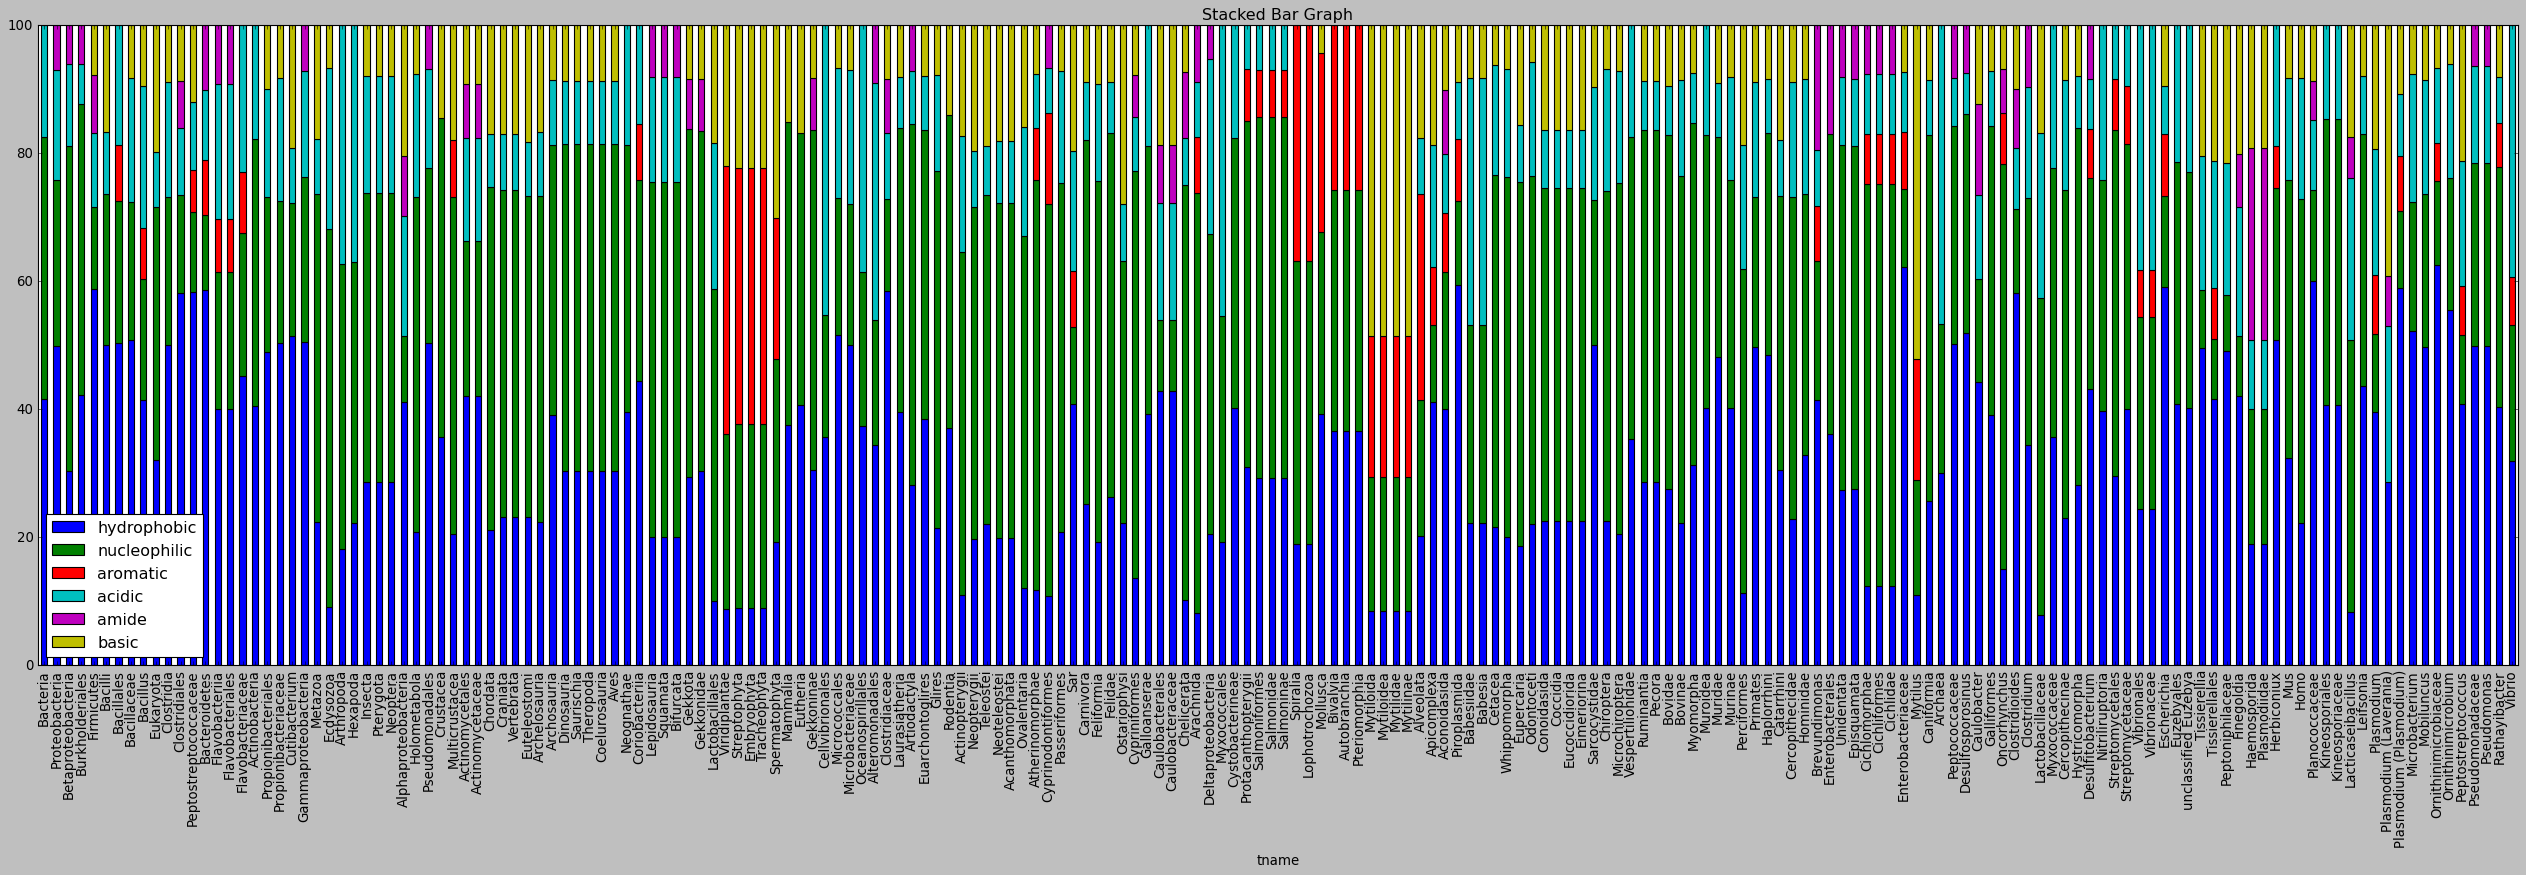

In [100]:
stat_df_simp.plot(
    x = 'tname',
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True, figsize=(40,10))

plt.savefig('pdf/pair_stack_bar.pdf', bbox_inches='tight')

### Contiguted As block distribution counts. (block_size)

In [4]:

import sequence_utils

from importlib import reload; reload(sequence_utils)
from sequence_utils import *


100%|██████████| 24707/24707 [00:11<00:00, 2107.75it/s]


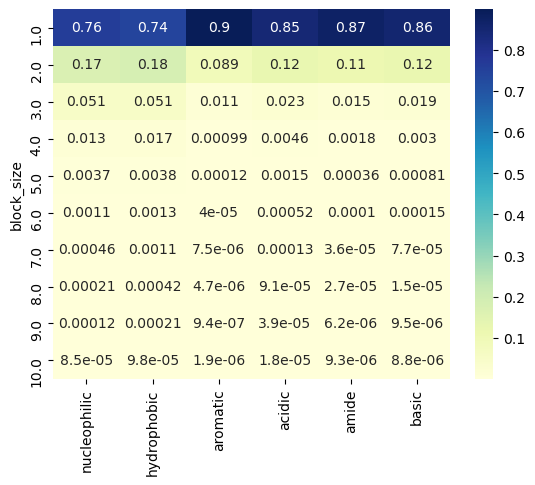

In [78]:

from itertools import groupby
import seaborn as sns
stat_dict = defaultdict(list)
block_max = 10
mat = np.zeros((block_max, 7))

# Iterate in the aln_files folder, producing con_files/*
for v in tqdm(seqs_taxo['Total']):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    # consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    one_mat = fill_heatmap_mat(v.seq)
    mat += one_mat


    # Note that df.plot(kind=) in default use the first column as the index, i.e. the x axis.
    # This time not use defaultdict(list), but use np.zeros to generte the ndarrays to store data and fill it out.

mat[:,0] = np.array(list(range(1, block_max+1)))
mat_percent = np.zeros((block_max, 7))

for i in range(10):
    for j in range(1,7):
        mat_percent[i][j] = mat[i][j]/np.sum(mat[:,j])

mat_percent[:,0] = np.array(list(range(1, block_max+1)))

df = pd.DataFrame(mat_percent, columns=['block_size', 'nucleophilic', 'hydrophobic','aromatic', 'acidic', 'amide', 'basic'])
# """
        #    '2': 'nucleophilic',
        #    '3': 'hydrophobic',
        #    '4': 'aromatic',
        #    '5': 'acidic',
        #    '6': 'amide',
        #    '7': 'basic'}
        #    """
# stat_all = defaultdict(list)
# stat_all['block_size'] = list(range(1, block_max+1))
# ic(mc)
# ic(groups)
df_index = df.set_index('block_size')

sns.heatmap(df_index, annot=True, cmap="YlGnBu")
plt.savefig(f'csv/block_size_heatmap.pdf', bbox_inches='tight')
# plt.savefig(f'SI_figs/heatmap/{k}_heatmap.pdf', bbox_inches='tight')
# plt.clf()


In [77]:
df_index.to_csv('csv/block_size_heatmap.csv')

<Figure size 640x480 with 0 Axes>

### Pair heatmap computation. (consensus sequence pair counts)

In [1]:
import pickle
with open('pkl/seqs_species_8.pkl', 'rb') as f:
    scan_dict = pickle.load(f)


In [8]:
# print(scan_dict.keys(), len())
sort_list = []
sort_key = []
for k, v in scan_dict.items():
    print(k, len(v))
    sort_list.append(len(v))
    sort_key.append(k)

s_idx = np.argsort(sort_list)

[(sort_key[i], sort_list[i]) for i in s_idx]



Proteobacteria 3187
Arthropoda 758
Cnidaria 53
Chordata 6080
Stramenopiles 11
Echinodermata 37
Lophotrochozoa 353
Platyhelminthes 10


<IPython.core.display.Javascript object>

[('Platyhelminthes', 10),
 ('Stramenopiles', 11),
 ('Echinodermata', 37),
 ('Cnidaria', 53),
 ('Lophotrochozoa', 353),
 ('Arthropoda', 758),
 ('Proteobacteria', 3187),
 ('Chordata', 6080)]

In [5]:

stat_dict = defaultdict(list)
subgroup_dict = {}

# Iterate in the aln_files folder, producing con_files/*
for k,v in scan_dict.items():
    # align = AlignIO.read(f"aln_files_six/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # print(consensus)
    # input()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files_six/{k}.txt', 'fasta')
    # with open(f'con_files_six/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*

    subgroup = process_pair_str(consensus)
    
    # # subgroup = process_pair_list(v)
    subgroup_dict[k] = subgroup
    
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)
    """Top 5 pairs cut.
    """




In [6]:
subgroup_df = pd.DataFrame(subgroup_dict)
subgroup_df

,Proteobacteria,Arthropoda,Cnidaria,Chordata,Stramenopiles,Echinodermata,Lophotrochozoa,Platyhelminthes
nucleophilic - hydrophobic,724,557,309,510,64,380,208,193
hydrophobic - acidic,396,444,152,232,36,158,34,101
hydrophobic - hydrophobic,393,335,196,308,34,159,167,97
hydrophobic - amide,297,145,120,129,17,102,45,69
nucleophilic - acidic,257,320,115,202,28,192,24,102
nucleophilic - nucleophilic,211,243,169,268,18,207,85,88
hydrophobic - aromatic,171,114,148,168,25,157,183,64
nucleophilic - amide,140,90,89,139,9,147,30,71
hydrophobic - basic,131,221,159,281,36,122,86,104
acidic - acidic,122,187,31,62,9,36,13,40


In [7]:
sorted_df = subgroup_df.sort_values(by=['Proteobacteria'], ascending=False)
for col in sorted_df.columns:
    sorted_df[col] = sorted_df[col] / sum(sorted_df[col])
sorted_df

,Proteobacteria,Arthropoda,Cnidaria,Chordata,Stramenopiles,Echinodermata,Lophotrochozoa,Platyhelminthes
nucleophilic - hydrophobic,0.206916,0.165873,0.143521,0.162008,0.162850,0.155674,0.164427,0.130670
hydrophobic - acidic,0.113175,0.132222,0.070599,0.073698,0.091603,0.064728,0.026877,0.068382
hydrophobic - hydrophobic,0.112318,0.099762,0.091036,0.097840,0.086514,0.065137,0.132016,0.065674
hydrophobic - amide,0.084881,0.043180,0.055736,0.040978,0.043257,0.041786,0.035573,0.046716
nucleophilic - acidic,0.073450,0.095295,0.053414,0.064168,0.071247,0.078656,0.018972,0.069059
nucleophilic - nucleophilic,0.060303,0.072365,0.078495,0.085133,0.045802,0.084801,0.067194,0.059580
hydrophobic - aromatic,0.048871,0.033949,0.068741,0.053367,0.063613,0.064318,0.144664,0.043331
nucleophilic - amide,0.040011,0.026802,0.041338,0.044155,0.022901,0.060221,0.023715,0.048070
hydrophobic - basic,0.037439,0.065813,0.073850,0.089263,0.091603,0.049980,0.067984,0.070413
acidic - acidic,0.034867,0.055688,0.014399,0.019695,0.022901,0.014748,0.010277,0.027082


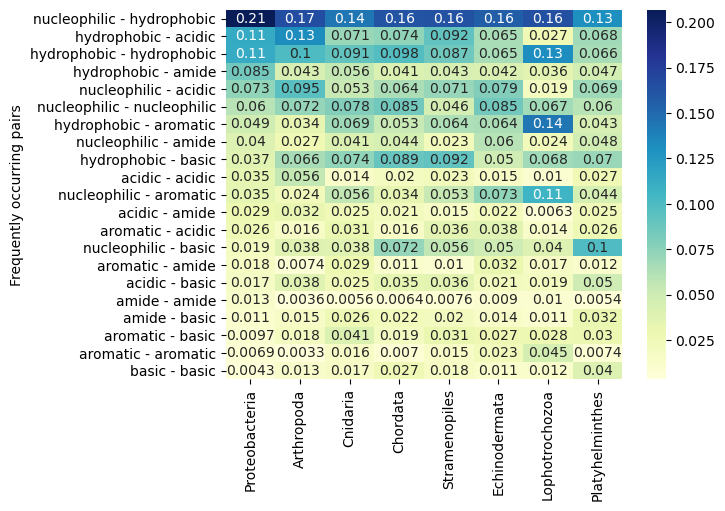

In [8]:
ax = sns.heatmap(sorted_df, annot=True, cmap="YlGnBu")
# ax.set_xlabel("Subgroup")
ax.set_ylabel("Frequently occurring pairs")
plt.savefig("csv/consensus_paircounts_heatmap_p.pdf", bbox_inches="tight")

In [9]:
sorted_df.to_csv('csv/consensus_paircounts_heatmap_p.csv')

### Pair heatmap computation. (consensus sequence pair counts, 200 + resilin)

In [1]:
import pickle
with open('seqs_taxo.pkl', 'rb') as f:
# with open('pkl/seqs_taxo_resilin_top18.pkl', 'rb') as f:
    scan_dict = pickle.load(f)


In [6]:

stat_dict = defaultdict(list)
subgroup_dict = {}

# Iterate in the aln_files folder, producing con_files/*
for k,v in scan_dict.items():
    # align = AlignIO.read(f"aln_files_six/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # print(consensus)
    # input()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files_six/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*

    subgroup = process_pair_str(consensus)
    
    # # subgroup = process_pair_list(v)
    subgroup_dict[k] = subgroup
    
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)
    """Top 5 pairs cut.
    """




In [7]:
subgroup_df = pd.DataFrame(subgroup_dict)
subgroup_df

,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,Eukaryota,...,Plasmodium (Plasmodium),Microbacterium,Mobiluncus,Ornithinimicrobiaceae,Ornithinimicrobium,Peptostreptococcus,Pseudomonadaceae,Pseudomonas,Rathayibacter,Vibrio
nucleophilic - hydrophobic,1908,724,692,728,126,100,91,100,92,1856,...,214,133,257,219,165,158,1240,1240,102,142
hydrophobic - acidic,1023,396,233,223,118,60,79,86,120,1176,...,179,126,156,206,128,157,525,525,35,163
hydrophobic - hydrophobic,1020,393,216,256,111,69,79,81,100,1529,...,221,165,169,273,186,128,508,508,59,104
nucleophilic - acidic,688,257,162,159,58,42,50,44,61,791,...,92,53,90,73,57,82,290,290,22,98
hydrophobic - amide,676,297,209,224,94,43,39,53,44,808,...,130,49,84,69,55,117,366,366,27,71
nucleophilic - nucleophilic,621,211,349,369,29,23,22,24,22,848,...,66,20,82,49,31,33,260,260,25,65
nucleophilic - amide,475,140,134,158,51,26,27,19,22,501,...,57,19,60,31,24,46,220,220,13,48
hydrophobic - basic,432,131,98,100,80,62,59,58,81,1414,...,191,74,136,119,67,186,145,145,35,69
hydrophobic - aromatic,422,171,59,73,39,48,61,42,72,706,...,151,84,69,109,81,118,145,145,34,92
acidic - acidic,354,122,36,32,20,17,34,29,39,282,...,71,20,21,44,35,35,103,103,5,85


In [8]:
subgroup_df['Total_200_stack'] = subgroup_df.sum(axis=1)

In [9]:
subgroup_df['Total_200_stack']

nucleophilic - hydrophobic     61700.0
hydrophobic - acidic           34525.0
hydrophobic - hydrophobic      45005.0
nucleophilic - acidic          25043.0
hydrophobic - amide            23842.0
nucleophilic - nucleophilic    26817.0
nucleophilic - amide           16817.0
hydrophobic - basic            30716.0
hydrophobic - aromatic         23637.0
acidic - acidic                10523.0
acidic - amide                 10303.0
nucleophilic - aromatic        17654.0
aromatic - acidic               9476.0
nucleophilic - basic           20108.0
acidic - basic                 14187.0
aromatic - amide                6377.0
amide - basic                   8581.0
aromatic - basic                9817.0
amide - amide                   4213.0
aromatic - aromatic             4325.0
basic - basic                   8370.0
Name: Total_200_stack, dtype: float64

In [10]:
sorted_df = subgroup_df.sort_values(by=['Total_200_stack'], ascending=False)
for col in sorted_df.columns:
    sorted_df[col] = sorted_df[col] / sum(sorted_df[col])
sorted_df

,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,Eukaryota,...,Microbacterium,Mobiluncus,Ornithinimicrobiaceae,Ornithinimicrobium,Peptostreptococcus,Pseudomonadaceae,Pseudomonas,Rathayibacter,Vibrio,Total_200_stack
nucleophilic - hydrophobic,0.196681,0.206916,0.264223,0.265403,0.124138,0.141443,0.118799,0.126743,0.096537,0.130539,...,0.132735,0.166128,0.147773,0.156546,0.091488,0.275128,0.275128,0.216561,0.103877,0.149744
hydrophobic - hydrophobic,0.105144,0.112318,0.082474,0.093328,0.109360,0.097595,0.103133,0.102662,0.104932,0.107540,...,0.164671,0.109244,0.184211,0.176471,0.074117,0.112714,0.112714,0.125265,0.076079,0.109226
hydrophobic - acidic,0.105453,0.113175,0.088965,0.081298,0.116256,0.084866,0.103133,0.108999,0.125918,0.082712,...,0.125749,0.100840,0.139001,0.121442,0.090909,0.116485,0.116485,0.074310,0.119239,0.083791
hydrophobic - basic,0.044531,0.037439,0.037419,0.036456,0.078818,0.087694,0.077023,0.073511,0.084995,0.099451,...,0.073852,0.087912,0.080297,0.063567,0.107701,0.032172,0.032172,0.074310,0.050475,0.074547
nucleophilic - nucleophilic,0.064014,0.060303,0.133257,0.134524,0.028571,0.032532,0.028721,0.030418,0.023085,0.059643,...,0.019960,0.053006,0.033063,0.029412,0.019108,0.057688,0.057688,0.053079,0.047549,0.065084
nucleophilic - acidic,0.070921,0.073450,0.061856,0.057966,0.057143,0.059406,0.065274,0.055767,0.064008,0.055634,...,0.052894,0.058177,0.049258,0.054080,0.047481,0.064344,0.064344,0.046709,0.071690,0.060779
hydrophobic - amide,0.069684,0.084881,0.079801,0.081662,0.092611,0.060820,0.050914,0.067174,0.046170,0.056829,...,0.048902,0.054299,0.046559,0.052182,0.067748,0.081207,0.081207,0.057325,0.051939,0.057864
hydrophobic - aromatic,0.043501,0.048871,0.022528,0.026613,0.038424,0.067893,0.079634,0.053232,0.075551,0.049655,...,0.083832,0.044602,0.073549,0.076850,0.068327,0.032172,0.032172,0.072187,0.067301,0.057366
nucleophilic - basic,0.025255,0.019148,0.026346,0.020051,0.040394,0.063649,0.043081,0.049430,0.031480,0.063019,...,0.029940,0.053652,0.023617,0.020873,0.044007,0.012425,0.012425,0.042463,0.029261,0.048802
nucleophilic - aromatic,0.031131,0.034581,0.033601,0.036456,0.023645,0.032532,0.045692,0.040558,0.049318,0.036433,...,0.032934,0.040078,0.036437,0.043643,0.040533,0.023519,0.023519,0.040340,0.046818,0.042846


In [11]:
sorted_df.to_csv('stack_200_block_size/stack_200_pairwise_distribution.csv')

### stack_18_resilin_pairwise_distribution

In [12]:
import pickle
# with open('seqs_.pkl', 'rb') as f:
with open('pkl/seqs_taxo_resilin_top18.pkl', 'rb') as f:
    scan_dict = pickle.load(f)


In [13]:

stat_dict = defaultdict(list)
subgroup_dict = {}

# Iterate in the aln_files folder, producing con_files/*
for k,v in scan_dict.items():
    # align = AlignIO.read(f"aln_files_six/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # print(consensus)
    # input()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files_resilin/{k}.txt', 'fasta')
    # with open(f'con_files_six/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*

    subgroup = process_pair_str(consensus)
    
    # # subgroup = process_pair_list(v)
    subgroup_dict[k] = subgroup
    
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)

In [14]:
subgroup_df = pd.DataFrame(subgroup_dict)
subgroup_df

,Eukaryota,Metazoa,Ecdysozoa,Arthropoda,Hexapoda,Insecta,Pterygota,Neoptera,Endopterygota,Crustacea,Multicrustacea,Malacostraca,Eumalacostraca,Eucarida,Decapoda,Pleocyemata,Caridea,Palaemonoidea
hydrophobic - hydrophobic,103,104,110,110,87,87,87,95,95,128,103,104,104,97,97,101,73,73
hydrophobic - aromatic,98,81,96,96,89,89,89,97,114,93,99,98,98,77,77,87,74,74
nucleophilic - hydrophobic,95,104,94,94,68,68,68,95,103,112,102,117,117,120,120,155,101,101
hydrophobic - amide,64,46,36,36,44,44,44,54,58,51,45,48,48,43,43,50,66,66
hydrophobic - acidic,51,42,48,48,109,109,109,35,97,35,47,36,36,34,34,26,15,15
nucleophilic - nucleophilic,49,45,20,20,32,32,32,17,23,30,39,43,43,29,29,40,34,34
nucleophilic - amide,43,33,31,31,16,16,16,12,26,26,37,34,34,36,36,41,115,115
nucleophilic - aromatic,43,58,38,38,42,42,42,49,49,34,49,37,37,35,35,37,58,58
hydrophobic - basic,40,49,55,55,51,51,51,37,56,71,65,58,58,42,42,55,45,45
nucleophilic - acidic,33,20,24,24,72,72,72,14,40,47,61,50,50,46,46,42,29,29


In [15]:
subgroup_df['Total_18_stack'] = subgroup_df.sum(axis=1)

In [16]:
subgroup_df['Total_18_stack']

hydrophobic - hydrophobic      1758
hydrophobic - aromatic         1626
nucleophilic - hydrophobic     1834
hydrophobic - amide             886
hydrophobic - acidic            926
nucleophilic - nucleophilic     591
nucleophilic - amide            698
nucleophilic - aromatic         781
hydrophobic - basic             926
nucleophilic - acidic           771
nucleophilic - basic            436
aromatic - amide                492
amide - basic                   299
aromatic - acidic               326
aromatic - basic                271
acidic - acidic                 190
amide - amide                   521
acidic - basic                  316
aromatic - aromatic             262
basic - basic                   177
acidic - amide                  233
Name: Total_18_stack, dtype: int64

In [17]:
sorted_df = subgroup_df.sort_values(by=['Total_18_stack'], ascending=False)
for col in sorted_df.columns:
    sorted_df[col] = sorted_df[col] / sum(sorted_df[col])
sorted_df

,Eukaryota,Metazoa,Ecdysozoa,Arthropoda,Hexapoda,Insecta,Pterygota,Neoptera,Endopterygota,Crustacea,Multicrustacea,Malacostraca,Eumalacostraca,Eucarida,Decapoda,Pleocyemata,Caridea,Palaemonoidea,Total_18_stack
nucleophilic - hydrophobic,0.117574,0.133676,0.128944,0.128944,0.088197,0.088197,0.088197,0.147745,0.111351,0.135429,0.117512,0.142163,0.142163,0.165289,0.165289,0.184964,0.114512,0.114512,0.128073
hydrophobic - hydrophobic,0.127475,0.133676,0.150892,0.150892,0.112840,0.112840,0.112840,0.147745,0.102703,0.154776,0.118664,0.126367,0.126367,0.133609,0.133609,0.120525,0.082766,0.082766,0.122765
hydrophobic - aromatic,0.121287,0.104113,0.131687,0.131687,0.115435,0.115435,0.115435,0.150855,0.123243,0.112455,0.114055,0.119077,0.119077,0.106061,0.106061,0.103819,0.083900,0.083900,0.113547
hydrophobic - acidic,0.063119,0.053985,0.065844,0.065844,0.141375,0.141375,0.141375,0.054432,0.104865,0.042322,0.054147,0.043742,0.043742,0.046832,0.046832,0.031026,0.017007,0.017007,0.064665
hydrophobic - basic,0.049505,0.062982,0.075446,0.075446,0.066148,0.066148,0.066148,0.057543,0.060541,0.085852,0.074885,0.070474,0.070474,0.057851,0.057851,0.065632,0.051020,0.051020,0.064665
hydrophobic - amide,0.079208,0.059126,0.049383,0.049383,0.057069,0.057069,0.057069,0.083981,0.062703,0.061669,0.051843,0.058323,0.058323,0.059229,0.059229,0.059666,0.074830,0.074830,0.061872
nucleophilic - aromatic,0.053218,0.074550,0.052126,0.052126,0.054475,0.054475,0.054475,0.076205,0.052973,0.041112,0.056452,0.044957,0.044957,0.048209,0.048209,0.044153,0.065760,0.065760,0.054539
nucleophilic - acidic,0.040842,0.025707,0.032922,0.032922,0.093385,0.093385,0.093385,0.021773,0.043243,0.056832,0.070276,0.060753,0.060753,0.063361,0.063361,0.050119,0.032880,0.032880,0.053841
nucleophilic - amide,0.053218,0.042416,0.042524,0.042524,0.020752,0.020752,0.020752,0.018663,0.028108,0.031439,0.042627,0.041312,0.041312,0.049587,0.049587,0.048926,0.130385,0.130385,0.048743
nucleophilic - nucleophilic,0.060644,0.057841,0.027435,0.027435,0.041505,0.041505,0.041505,0.026439,0.024865,0.036276,0.044931,0.052248,0.052248,0.039945,0.039945,0.047733,0.038549,0.038549,0.041271


In [18]:
sorted_df.to_csv('stack_200_block_size/stack_18_resilin_pairwise_distribution.csv')

### stack_25_fibrous_pairwise_distribution

In [2]:
import pickle
# with open('seqs_.pkl', 'rb') as f:
with open('pkl/seqs_taxo_fibrous_top25.pkl', 'rb') as f:
    scan_dict = pickle.load(f)


In [7]:

stat_dict = defaultdict(list)
subgroup_dict = {}

# Iterate in the aln_files folder, producing con_files/*
for k,v in scan_dict.items():
    # align = AlignIO.read(f"aln_files_six/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # print(consensus)
    # input()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files_fibrous/{k}.txt', 'fasta')
    # with open(f'con_files_six/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*

    subgroup = process_pair_str(consensus)
    
    # # subgroup = process_pair_list(v)
    subgroup_dict[k] = subgroup
    
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)

In [13]:
subgroup_df.shape

(21, 26)

In [8]:
subgroup_df = pd.DataFrame(subgroup_dict)
subgroup_df

<IPython.core.display.Javascript object>

,Eukaryota,Metazoa,Chordata,Craniata,Vertebrata,Euteleostomi,Mammalia,Eutheria,Euarchontoglires,Primates,...,Glires,Rodentia,Myomorpha,Muroidea,Bacteria,Bacillota,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus
nucleophilic - hydrophobic,359,327,209,209,209,209,401,401,297,358,...,300,300,300,300,102,31,31,31,31,31
hydrophobic - acidic,351,313,268,268,268,268,386,386,315,338,...,329,329,329,329,74,13,13,13,13,13
hydrophobic - basic,351,282,242,242,242,242,323,323,275,328,...,265,265,265,265,89,43,43,43,43,43
hydrophobic - hydrophobic,311,325,225,225,225,225,320,320,311,311,...,285,285,285,285,92,29,29,29,29,29
hydrophobic - amide,255,160,149,149,149,149,235,235,168,214,...,189,189,189,189,56,25,25,25,25,25
acidic - basic,222,162,127,127,127,127,190,190,138,173,...,147,147,147,147,31,6,6,6,6,6
nucleophilic - acidic,203,147,84,84,84,84,206,206,131,124,...,150,150,150,150,31,8,8,8,8,8
nucleophilic - basic,195,156,88,88,88,88,200,200,146,173,...,147,147,147,147,36,12,12,12,12,12
hydrophobic - aromatic,131,127,82,82,82,82,120,120,131,121,...,110,110,110,110,57,15,15,15,15,15
amide - basic,123,70,78,78,78,78,95,95,66,102,...,101,101,101,101,27,19,19,19,19,19


In [9]:
subgroup_df['Total_25_stack'] = subgroup_df.sum(axis=1)

In [10]:
subgroup_df['Total_25_stack']

nucleophilic - hydrophobic     6280
hydrophobic - acidic           6336
hydrophobic - basic            5901
hydrophobic - hydrophobic      5762
hydrophobic - amide            3900
acidic - basic                 3107
nucleophilic - acidic          2718
nucleophilic - basic           3037
hydrophobic - aromatic         2312
amide - basic                  1926
nucleophilic - nucleophilic    1784
nucleophilic - amide           1837
acidic - amide                 1809
basic - basic                  1401
nucleophilic - aromatic        1366
acidic - acidic                1702
aromatic - basic               1294
aromatic - acidic              1079
aromatic - amide                792
amide - amide                   699
aromatic - aromatic             324
Name: Total_25_stack, dtype: int64

In [11]:
sorted_df = subgroup_df.sort_values(by=['Total_25_stack'], ascending=False)
for col in sorted_df.columns:
    sorted_df[col] = sorted_df[col] / sum(sorted_df[col])
sorted_df

,Eukaryota,Metazoa,Chordata,Craniata,Vertebrata,Euteleostomi,Mammalia,Eutheria,Euarchontoglires,Primates,...,Rodentia,Myomorpha,Muroidea,Bacteria,Bacillota,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Total_25_stack
hydrophobic - acidic,0.102902,0.112549,0.129344,0.129344,0.129344,0.129344,0.114881,0.114881,0.119003,0.111331,...,0.126150,0.126150,0.126150,0.090575,0.041801,0.041801,0.041801,0.041801,0.041801,0.114438
nucleophilic - hydrophobic,0.105248,0.117584,0.100869,0.100869,0.100869,0.100869,0.119345,0.119345,0.112202,0.117918,...,0.115031,0.115031,0.115031,0.124847,0.099678,0.099678,0.099678,0.099678,0.099678,0.113427
hydrophobic - basic,0.102902,0.101402,0.116795,0.116795,0.116795,0.116795,0.096131,0.096131,0.103891,0.108037,...,0.101610,0.101610,0.101610,0.108935,0.138264,0.138264,0.138264,0.138264,0.138264,0.106582
hydrophobic - hydrophobic,0.091176,0.116864,0.108591,0.108591,0.108591,0.108591,0.095238,0.095238,0.117491,0.102437,...,0.109279,0.109279,0.109279,0.112607,0.093248,0.093248,0.093248,0.093248,0.093248,0.104071
hydrophobic - amide,0.074758,0.057533,0.071911,0.071911,0.071911,0.071911,0.069940,0.069940,0.063468,0.070487,...,0.072469,0.072469,0.072469,0.068543,0.080386,0.080386,0.080386,0.080386,0.080386,0.070440
acidic - basic,0.065084,0.058252,0.061293,0.061293,0.061293,0.061293,0.056548,0.056548,0.052134,0.056983,...,0.056365,0.056365,0.056365,0.037944,0.019293,0.019293,0.019293,0.019293,0.019293,0.056117
nucleophilic - basic,0.057168,0.056095,0.042471,0.042471,0.042471,0.042471,0.059524,0.059524,0.055157,0.056983,...,0.056365,0.056365,0.056365,0.044064,0.038585,0.038585,0.038585,0.038585,0.038585,0.054853
nucleophilic - acidic,0.059513,0.052859,0.040541,0.040541,0.040541,0.040541,0.061310,0.061310,0.049490,0.040843,...,0.057515,0.057515,0.057515,0.037944,0.025723,0.025723,0.025723,0.025723,0.025723,0.049092
hydrophobic - aromatic,0.038405,0.045667,0.039575,0.039575,0.039575,0.039575,0.035714,0.035714,0.049490,0.039855,...,0.042178,0.042178,0.042178,0.069767,0.048232,0.048232,0.048232,0.048232,0.048232,0.041758
amide - basic,0.036060,0.025171,0.037645,0.037645,0.037645,0.037645,0.028274,0.028274,0.024934,0.033597,...,0.038727,0.038727,0.038727,0.033048,0.061093,0.061093,0.061093,0.061093,0.061093,0.034787


In [12]:
sorted_df.to_csv('stack_200_block_size/stack_25_fibrous_pairwise_distribution.csv')